In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from collections import defaultdict

# IQR based OUTLIER DETECTION

In [37]:
# Load the dataset
file_path = 'cleaned_dataset.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Define a function to compute IQR and flag outliers
def iqr_outliers(column):
    Q1 = column.quantile(0.25)  # 25th percentile
    Q3 = column.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Calculate the bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean series where True indicates an outlier
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Apply the IQR outlier detection to each relevant sensor column and filter out only the outliers
outliers_data = pd.DataFrame()

for column in ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed']:
    outliers = iqr_outliers(data[column])
    if outliers.any():  # Check if any outliers exist in this column
        outliers_data[column] = data[column][outliers]  # Store only outlier rows for this column

# Show the outliers
outliers_data

,Acc X,Acc Y,Acc Z,gyro_x,gyro_y,gyro_z
96,0.832253,NaN,NaN,NaN,NaN,NaN
97,0.799070,NaN,NaN,NaN,NaN,NaN
98,0.870786,NaN,NaN,NaN,NaN,0.054652
164,-1.082216,1.019267,-3.491384,-0.270756,NaN,NaN
165,-1.130505,1.642241,-3.783913,NaN,NaN,NaN
...,...,...,...,...,...,...
14191,1.520395,1.565442,-1.570513,NaN,NaN,NaN
14192,1.229296,1.503951,NaN,NaN,NaN,-0.070962
14193,1.619212,1.501497,NaN,-0.135266,NaN,-0.120076
14201,-0.980432,NaN,NaN,NaN,-0.082732,NaN


Acc X:
Lower bound: -0.784437322799999, Upper bound: 0.7735996339999998
Number of outliers: 2009
---
Acc Y:
Lower bound: -0.5061704929749989, Upper bound: 0.8517631364250026
Number of outliers: 1760
---
Acc Z:
Lower bound: -1.4051492313749996, Upper bound: 1.3785749856250025
Number of outliers: 1655
---
gyro_x:
Lower bound: -0.10747156412499977, Upper bound: 0.10510955287499954
Number of outliers: 2143
---
gyro_y:
Lower bound: -0.07145087187500003, Upper bound: 0.060007329124999856
Number of outliers: 2470
---
gyro_z:
Lower bound: -0.057991476424999855, Upper bound: 0.05343034817499975
Number of outliers: 1862
---


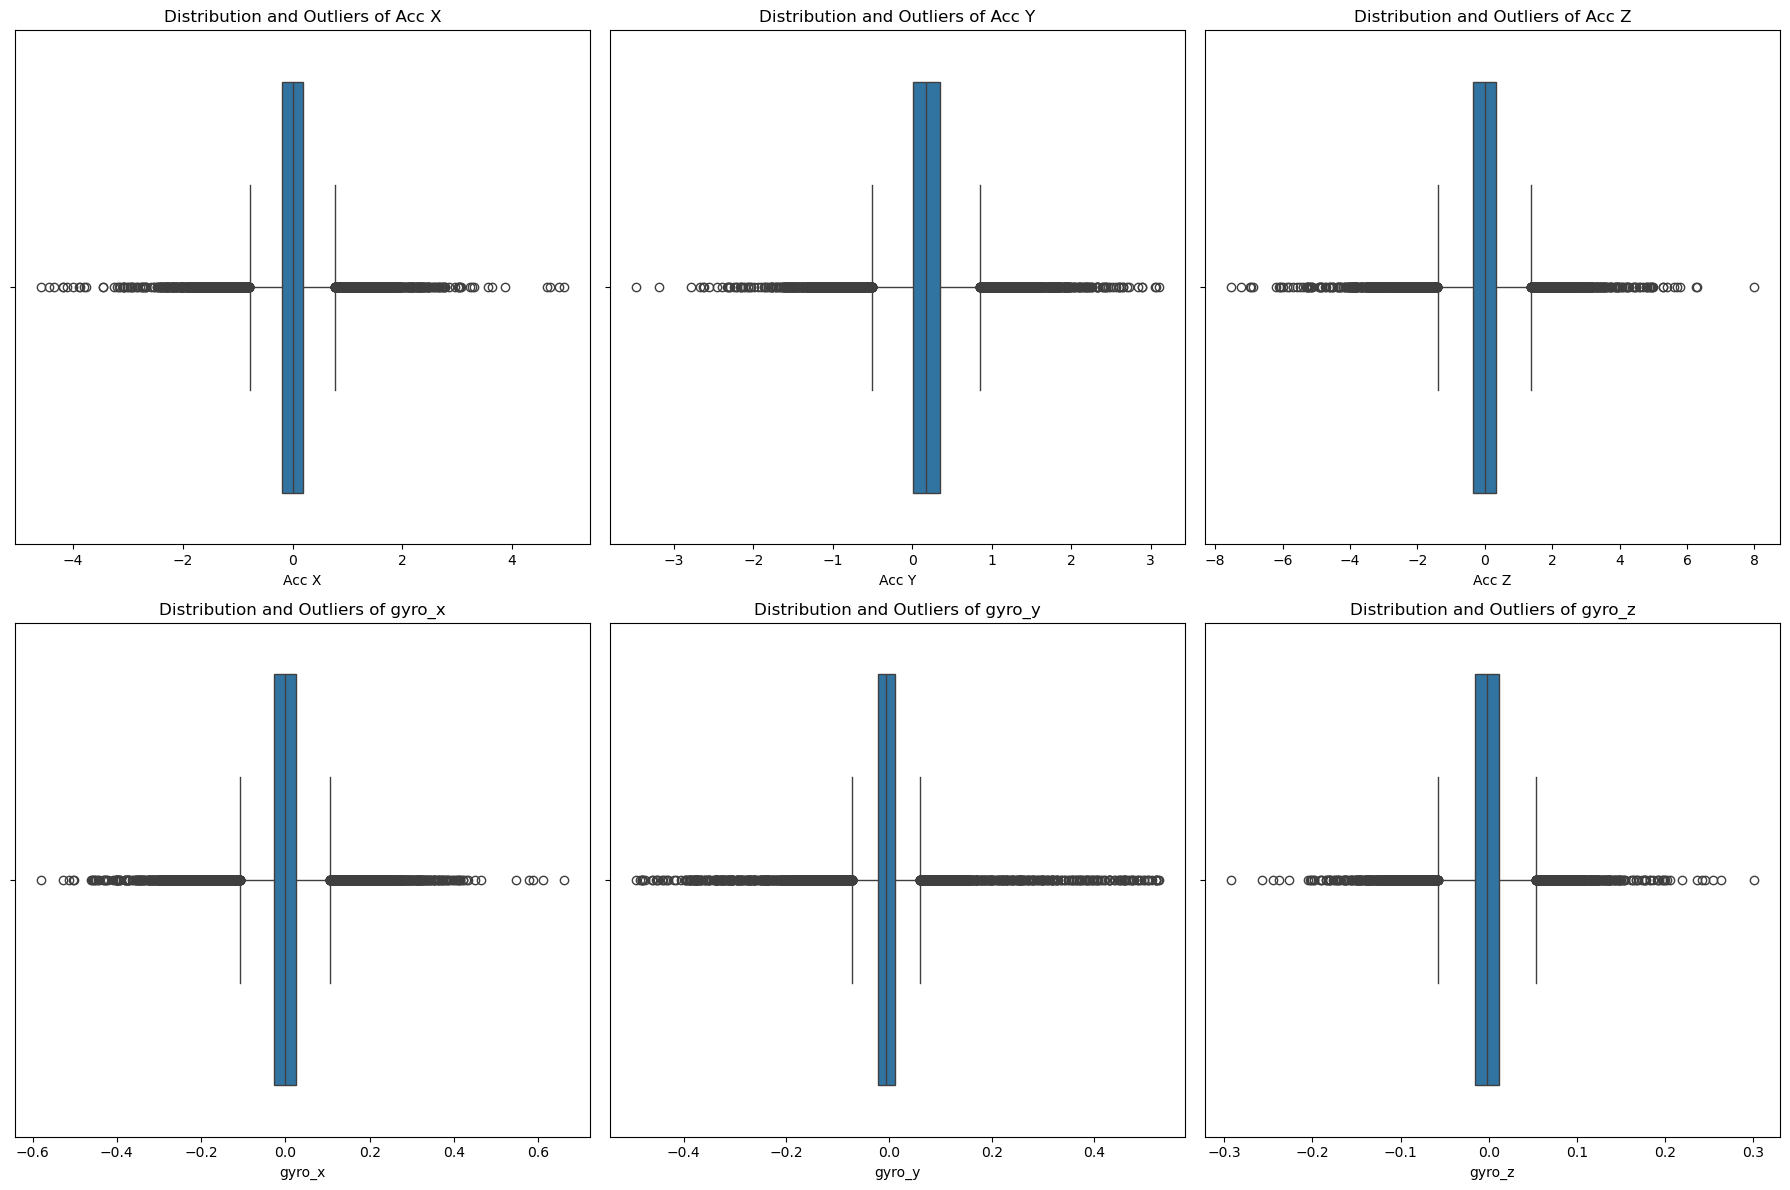

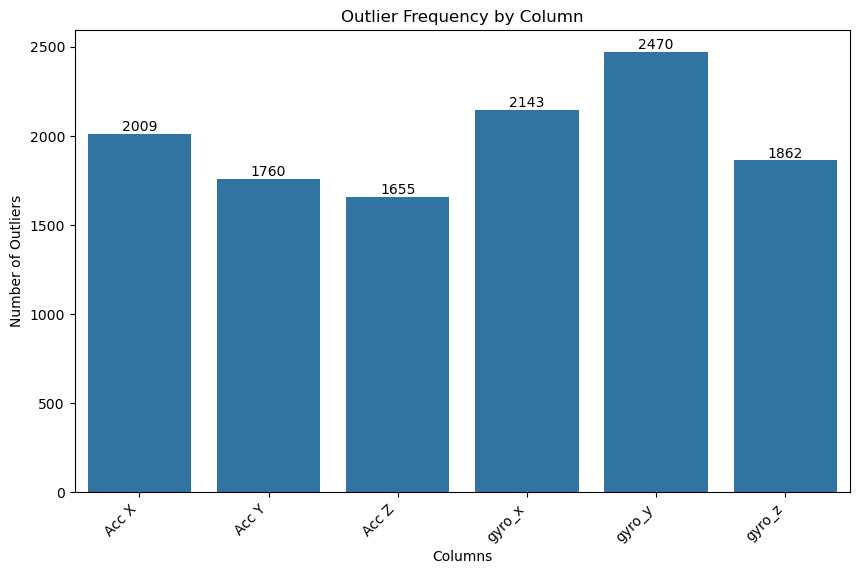

In [43]:
# Define a function to calculate IQR and identify outliers
def calculate_iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X','Acc Y','Acc Z','gyro_x','gyro_y','gyro_z']:
    outliers, lower_bound, upper_bound = calculate_iqr_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Distribution and Outliers of {col}')

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X','Acc Y','Acc Z','gyro_x','gyro_y','gyro_z']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
    
    # Adding text labels on top of each bar
    for i, count in enumerate(outlier_counts.values()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
    plt.show()

plot_outlier_frequency(outlier_counts)
iqr_outlier = outlier_counts